In [1]:
import os
import pickle
import scipy
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def dump_pickle(data, pickle_out):
    """
    Dumps pickle.
    """
    with open(pickle_out, "wb") as f:
        pickle.dump(data, f)

def load_pickle(pickle_in):
    """
    Loads pickle.
    """
    with open(pickle_in, "rb") as f:
        data = pickle.load(f)
    return data

In [49]:
wd = "."
input_id = "LmARS_XChem_hits"
in_dir = os.path.join(wd, "input", input_id)
out_dir = os.path.join(wd, "output", input_id)
results_dir = os.path.join(out_dir, "results")

In [50]:
ress_ss_dict = load_pickle(os.path.join(results_dir, '{}_ress_SS.pkl'.format(input_id)))                    # residue --> SS
ress_aa_dict = load_pickle(os.path.join(results_dir, '{}_ress_AA.pkl'.format(input_id)))                    # residue --> AA
ress_rsa_dict = load_pickle(os.path.join(results_dir, '{}_ress_RSA.pkl'.format(input_id)))                  # residue --> RSA
ress_bss_dict = load_pickle(os.path.join(results_dir, '{}_res_bss.pkl'.format(input_id)))                   # residue --> [binding sites]

lig_ress_dict = load_pickle(os.path.join(results_dir, '{}_lig_ress.pkl'.format(input_id)))                  # ligand --> [binding residues]
lig_inters_df = pd.read_pickle(os.path.join(results_dir, '{}_lig_inters.pkl'.format(input_id)))             # ligand interactions dataframe
lig_bs_dict = load_pickle(os.path.join(results_dir, '{}_lig_bs.pkl'.format(input_id)))                      # ligand --> binding site
lig_data_df = pd.read_pickle(os.path.join(results_dir, '{}_lig_data.pkl'.format(input_id)))                 # ligand dataframe

site_ress_dict = load_pickle(os.path.join(results_dir, '{}_site_ress.pkl'.format(input_id)))                # binding site --> [binding residues]
aa_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_AA_profiles.pkl'.format(input_id)))           # binding site --> [AA]
rsa_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_RSA_profiles.pkl'.format(input_id)))         # binding site --> [SS]
ss_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_SS_profiles.pkl'.format(input_id)))           # binding site --> [RSA]
rel_dist_df = pd.read_pickle(os.path.join(results_dir, '{}_rel_dist.pkl'.format(input_id)))                 # D = 1 - Irel matrix (DF)
bs_def_df = pd.read_pickle(os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.pkl'.format(input_id)))   # binding site definition
dssp_df = pd.read_pickle(os.path.join(results_dir, '{}_dssp_mapped.pkl'.format(input_id)))                  # DSSP dataframe
missense_df = pd.read_pickle(os.path.join(results_dir, '{}_missense_df.pkl'.format(input_id)))              # missense dataframe
consvar_df = pd.read_pickle(os.path.join(results_dir, '{}_ress_consvar.pkl'.format(input_id)))              # cons + var dataframe
results_df = pd.read_pickle(os.path.join(results_dir, '{}_results_table.pkl'.format(input_id)))             # final results table

#domains_file = os.path.join(results_dir, '{}_stamp.domains'.format(input_id))
#stamp_out = os.path.join(results_dir, '{}_stamp.out'.format(input_id))
#bs_attr = os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.attr'.format(input_id))
#bs_col_command = os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.com'.format(input_id))

## Residue level data

### Amino acid

In [51]:
print(len(ress_aa_dict))
for k, v in ress_aa_dict.items():
    print(k, v)
    break

513
39 A


### Relative Solvent Accessibility

In [52]:
print(len(ress_rsa_dict))
for k, v in ress_rsa_dict.items():
    print(k, v)
    break

513
39 87.08


### Secondary structure

In [53]:
print(len(ress_ss_dict))
for k, v in ress_ss_dict.items():
    print(k, v)
    break

513
39 C


### Binding site membership

In [54]:
print(len(ress_bss_dict)) # this will equal to the number of ligand binding residues
for k, v in ress_bss_dict.items():
    print(k, v)
    break

98
41 [5]


## Ligand level data

### Ligands

In [55]:
print(len(lig_data_df))
lig_data_df.head()

24


,struc_name,label_comp_id,label_asym_id,auth_seq_id
4021,LmARS-x0431_2y_DDD01012333_ALL.pdb,LIG,A,601
4021,LmARS-x0077_DDD01553400_ALL.pdb,LIG,A,601
8036,LmARS-x0077_DDD01553400_ALL.pdb,LIG,B,601
4021,LmARS-x0233_DDD0122020_ALL.pdb,LIG,A,601
8038,LmARS-x0233_DDD0122020_ALL.pdb,LIG,B,601


### Ligand binding residues

In [56]:
print(len(lig_ress_dict))
for k, v in lig_ress_dict.items():
    print(k, v)
    break

24
LmARS-x0046_DDD01816868_ALL_LIG_601_A [241, 242, 243, 244, 245, 264, 265, 266, 268, 269, 270, 273, 500, 501, 503, 504, 548, 549, 550]


### Ligand binding interactions

In [57]:
print(len(lig_inters_df))
lig_inters_df.head()

24


,pdb_id,lig_name,lig_resnum,lig_chain,binding_res,lab
0,LmARS-x0046_DDD01816868_ALL,LIG,601,A,"[241, 242, 243, 244, 245, 264, 265, 266, 268, ...",LmARS-x0046_DDD01816868_ALL_LIG_601_A
1,LmARS-x0046_DDD01816868_ALL,LIG,601,B,"[241, 242, 244, 245, 264, 265, 266, 268, 269, ...",LmARS-x0046_DDD01816868_ALL_LIG_601_B
2,LmARS-x0077_DDD01553400_ALL,LIG,601,A,"[290, 298, 299, 300, 303, 521, 524, 535]",LmARS-x0077_DDD01553400_ALL_LIG_601_A
3,LmARS-x0077_DDD01553400_ALL,LIG,601,B,"[290, 298, 299, 300, 303, 521, 524, 535]",LmARS-x0077_DDD01553400_ALL_LIG_601_B
4,LmARS-x0089_DDD00771487_ALL,LIG,601,A,"[317, 320, 370, 383, 393, 439, 441, 60]",LmARS-x0089_DDD00771487_ALL_LIG_601_A


### Ligand binding site membership

In [58]:
print(len(lig_bs_dict))
for k, v in lig_bs_dict.items():
    print(k, v)
    break

24
LmARS-x0046_DDD01816868_ALL_LIG_601_A 0


## Binding site level data

### Residue numbers

In [59]:
print(len(site_ress_dict))
for k, v in site_ress_dict.items():
    print(k, v)
    break

7
0 [241, 242, 243, 244, 245, 264, 265, 266, 267, 268, 269, 270, 273, 450, 451, 496, 497, 498, 500, 501, 502, 503, 504, 548, 549, 550]


### AA profile

In [60]:
print(len(aa_profs_dict))
for k, v in aa_profs_dict.items():
    print(k, v)
    break

7
0 ['I', 'N', 'A', 'P', 'S', 'A', 'Q', 'S', 'P', 'Q', 'L', 'Y', 'M', 'F', 'Y', 'V', 'D', 'L', 'P', 'I', 'K', 'E', 'Y', 'T', 'T', 'P']


### SS profile

In [61]:
print(len(ss_profs_dict))
for k, v in ss_profs_dict.items():
    print(k, v)
    break

7
0 ['E', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'H', 'H', 'H', 'H', 'T', 'T', 'C', 'C', 'C', 'G', 'G', 'H', 'H', 'H', 'C', 'C', 'C']


### RSA profile

In [62]:
print(len(rsa_profs_dict))
for k, v in rsa_profs_dict.items():
    print(k, v)
    break

7
0 [12.7, 34.42, 18.43, 59.02, 42.86, 3.3, 34.28, 27.05, 1.89, 8.28, 25.79, 6.35, 1.77, 13.55, 18.26, 40.49, 64.29, 7.32, 39.76, 19.07, 57.07, 22.17, 1.47, 3.94, 23.64, 10.88]


## Visualising ligand site definition

In [63]:
rel_dist_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000,0.053,1.0,1.0,1.0,1.0,0.417,0.357,1.0,1.0,...,0.818,0.833,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.053,0.000,1.0,1.0,1.0,1.0,0.417,0.357,1.0,1.0,...,0.818,0.833,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.000,1.000,0.0,0.0,1.0,1.0,1.000,1.000,1.0,1.0,...,0.750,0.625,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1.000,1.000,0.0,0.0,1.0,1.0,1.000,1.000,1.0,1.0,...,0.750,0.625,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,1.000,1.000,1.0,1.0,0.0,0.0,1.000,1.000,0.0,0.0,...,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [64]:
clust_method = "average"
clust_dist = 0.5
sample_colors = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#ffffff", "#000000"]
sample_colors_dict = {i: sample_colors[i] for i in range(len(sample_colors))}
condensed_dist_mat = scipy.spatial.distance.squareform(rel_dist_df) # condensed distance matrix to be used for clustering
linkage = scipy.cluster.hierarchy.linkage(condensed_dist_mat, method = clust_method, optimal_ordering = True)
cut_tree = scipy.cluster.hierarchy.cut_tree(linkage, height = clust_dist)
cluster_ids = [int(cut) for cut in cut_tree]
labs = lig_inters_df.lab.tolist()
cluster_id_dict = {labs[i]: cluster_ids[i] for i in range(len(labs))} #dictionary indicating membership for each lig

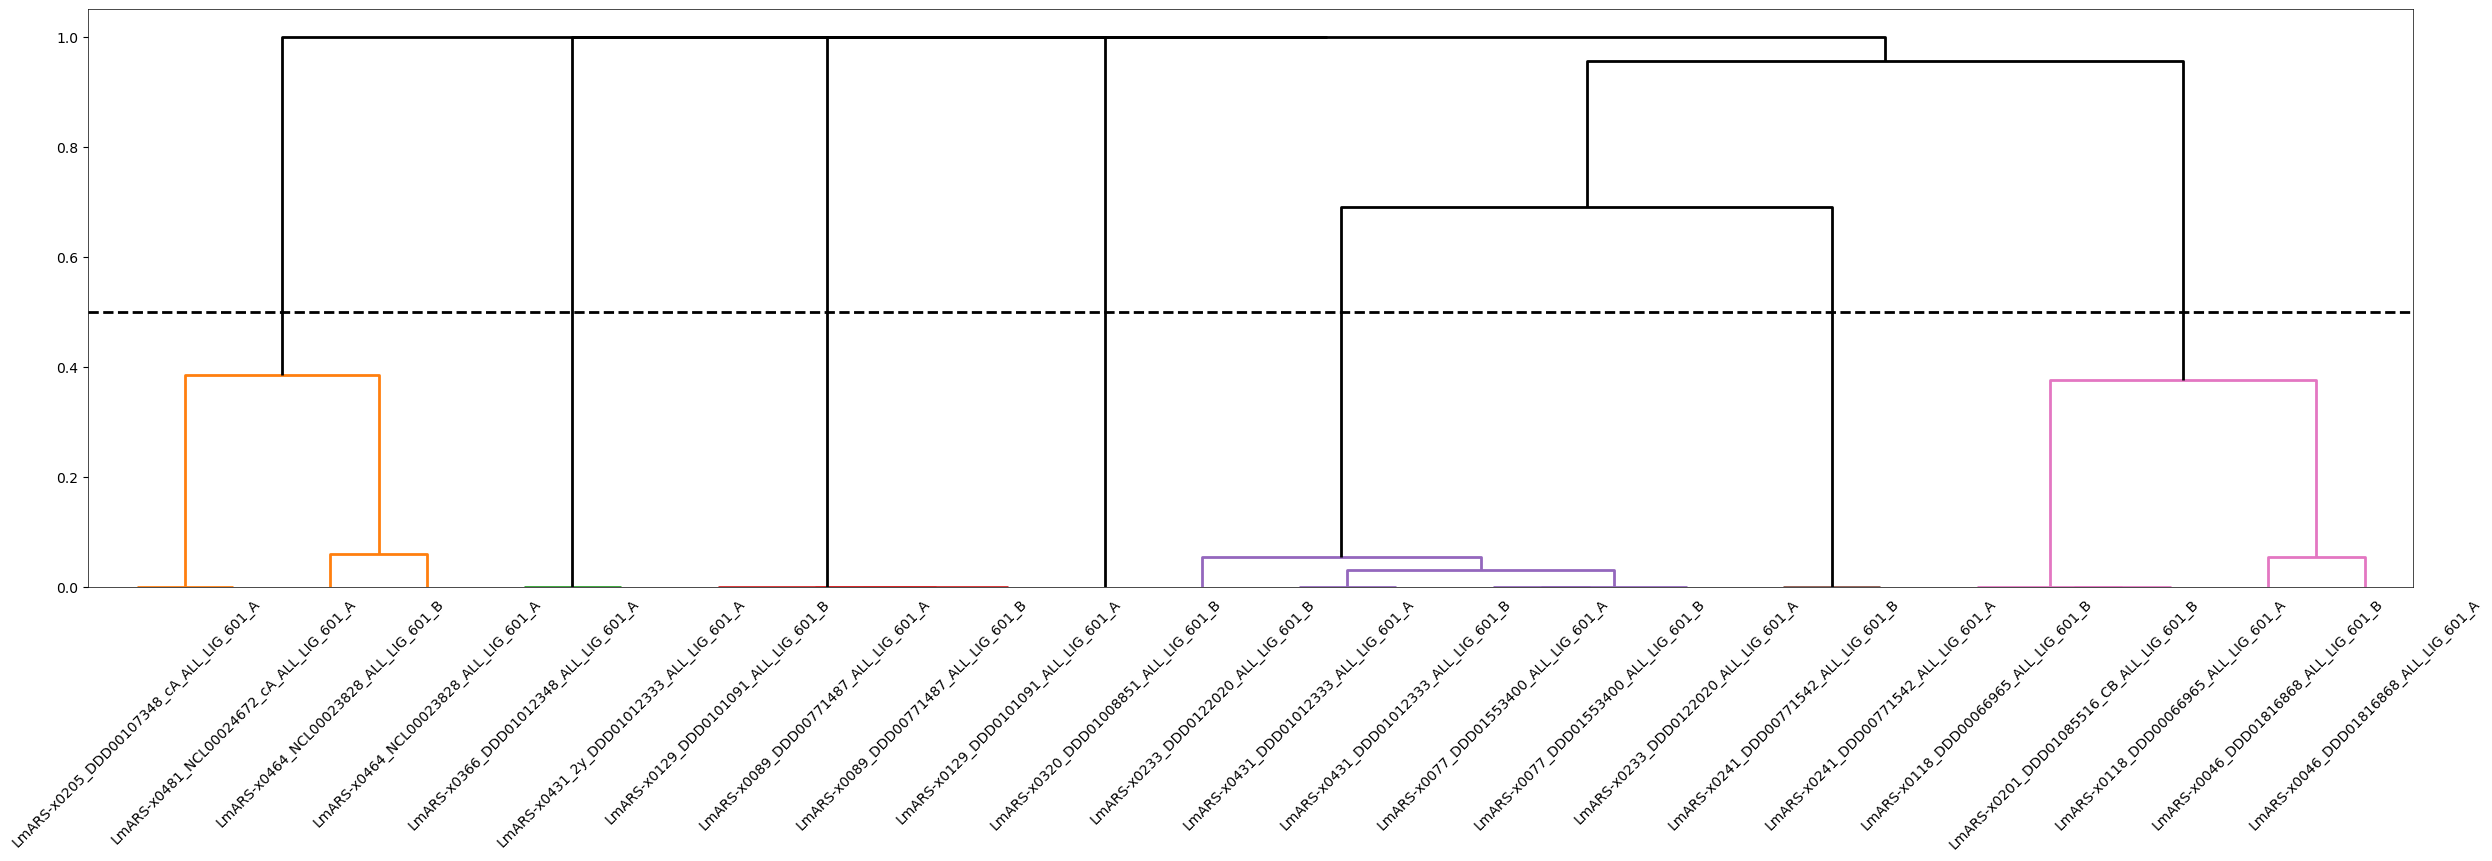

In [65]:
fig = plt.figure(figsize=(30, 7.5), dpi = 100)
matplotlib.rcParams['lines.linewidth'] = 2
dd = scipy.cluster.hierarchy.dendrogram(linkage, labels = labs, leaf_font_size = 10, color_threshold = clust_dist, above_threshold_color = "k")
# = [cluster_id_dict[d] for d in dd["ivl"]]
# = sorted(set(x), key=x.index)
#ols_list = [sample_colors[i] for i in x]
#cipy.cluster.hierarchy.set_link_color_palette(cols_list)

#[site_cluster_dict[k] for k in dd["ivl"]]
#if out != None:
#    plt.savefig(out)
    #print("Figure was successfully saved!")
#plt.ylim(0,20)
plt.axhline(y=clust_dist, c = "k", linestyle = "--")
#plt.ylim(-0.1)
plt.show()

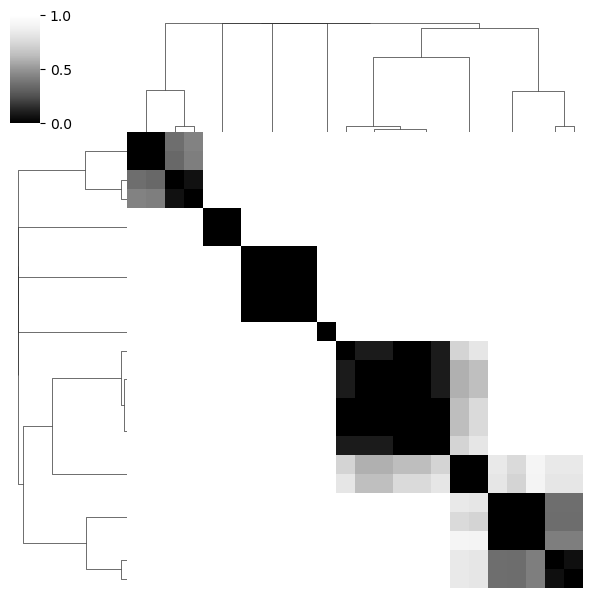

In [66]:
sns.clustermap(rel_dist_df, xticklabels = False, yticklabels = False, row_linkage=linkage, col_linkage=linkage, figsize=(6,6), cmap = "Greys_r")
#plt.savefig('./figs/fig_name.png', dpi = 600)
plt.show()

## Results table analysis

In [67]:
print("Minimum occupancy: {}".format(results_df.occ.min()))
print("Average occupancy: {}".format(round(results_df.occ.mean())))
print("Maximum occupancy: {}".format(results_df.occ.max()))

Minimum occupancy: 1
Average occupancy: 1262
Maximum occupancy: 1652


In [68]:
print("Minimum HUMAN occupancy: {}".format(results_df.human_occ.min()))
print("Average HUMAN occupancy: {}".format(round(results_df.human_occ.mean())))
print("Maximum HUMAN occupancy: {}".format(results_df.human_occ.max()))

Minimum HUMAN occupancy: 0
Average HUMAN occupancy: 4
Maximum HUMAN occupancy: 6


## Conservation & occupancy on target sequence (FULL MSA)

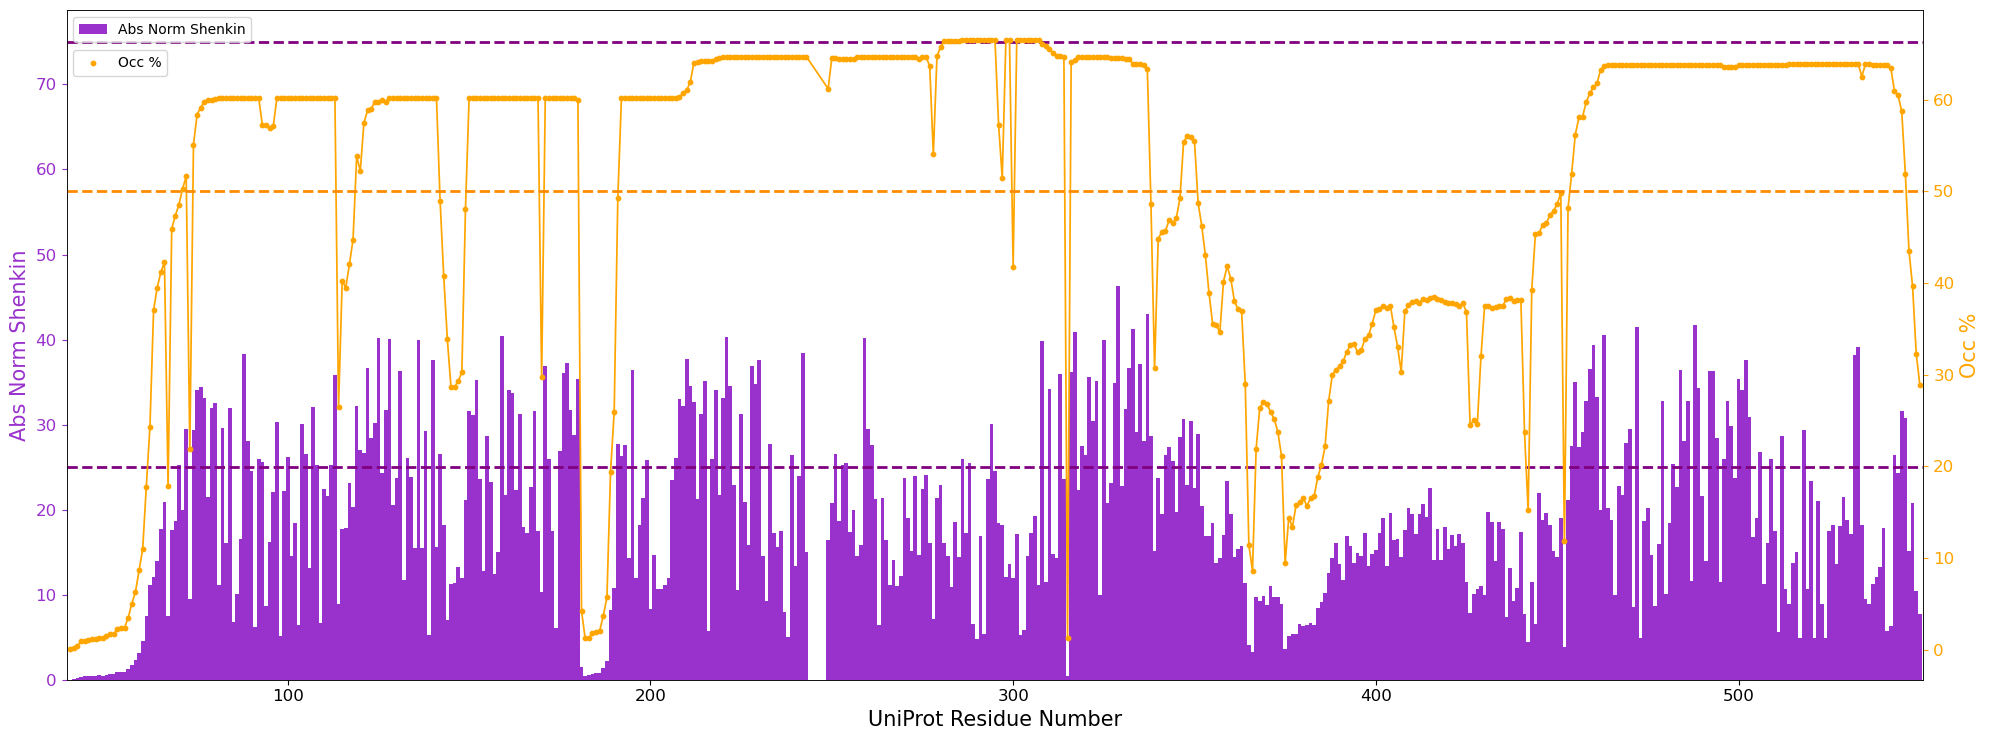

In [69]:
# Create the figure and the first axis (ax1)

plt.rcParams.update({"axes.linewidth": 0.5})

fig, ax1 = plt.subplots(figsize=(20, 7.5))

# Plot a barplot on ax1
ax1.bar(results_df['UniProt_ResNum'], results_df['abs_norm_shenkin'], color='darkorchid', label='Abs Norm Shenkin', width = 1)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
ax1.set_ylabel('Abs Norm Shenkin', color='darkorchid', fontsize = 15)
ax1.tick_params('x', colors='k', labelsize=12)
ax1.tick_params('y', colors='darkorchid', labelsize=12)
ax1.axhline(y = 25, linestyle = '--', c = 'purple')
ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# Create the second axis (ax2) based on the first axis (ax1)
ax2 = ax1.twinx()

# Plot a scatterplot + lineplot on ax2
ax2.scatter(results_df['UniProt_ResNum'], results_df['occ_pct'], color='orange', marker='o', label='Occ %', s = 10)
ax2.plot(results_df['UniProt_ResNum'], results_df['occ_pct'], color='orange', linewidth = 1.25)

# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Occ %', color='orange', fontsize = 15)
ax2.tick_params('y', colors='orange', labelsize=12)
ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

plt.xlim(results_df.UniProt_ResNum.min() - 1, results_df.UniProt_ResNum.max() + 1)

# Create legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# Show the plot
fig.tight_layout()
plt.show()


## Conservation & occupancy on target sequence (HUMAN MSA)

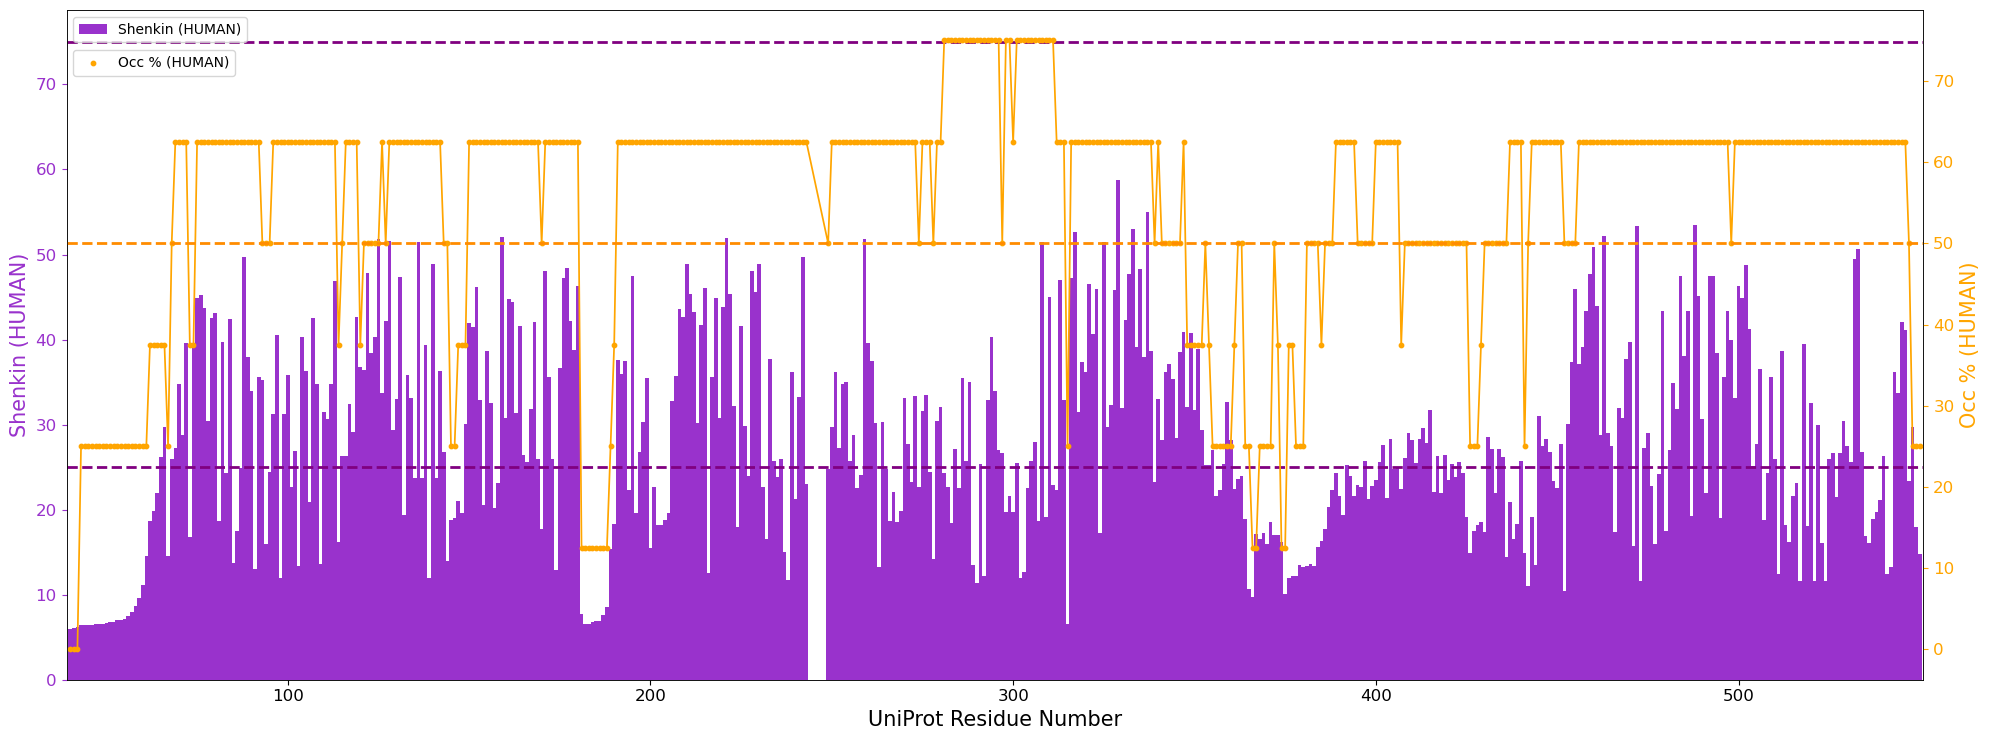

In [70]:
# Create the figure and the first axis (ax1)

plt.rcParams.update({"axes.linewidth": 0.5})

fig, ax1 = plt.subplots(figsize=(20, 7.5))

# Plot a barplot on ax1
ax1.bar(results_df['UniProt_ResNum'], results_df['human_shenkin'], color='darkorchid', label='Shenkin (HUMAN)', width = 1)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
ax1.set_ylabel('Shenkin (HUMAN)', color='darkorchid', fontsize = 15)
ax1.tick_params('x', colors='k', labelsize=12)
ax1.tick_params('y', colors='darkorchid', labelsize=12)
ax1.axhline(y = 25, linestyle = '--', c = 'purple')
ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# Create the second axis (ax2) based on the first axis (ax1)
ax2 = ax1.twinx()

# Plot a scatterplot + lineplot on ax2
ax2.scatter(results_df['UniProt_ResNum'], results_df['human_occ_pct'], color='orange', marker='o', label='Occ % (HUMAN)', s = 10)
ax2.plot(results_df['UniProt_ResNum'], results_df['human_occ_pct'], color='orange', linewidth = 1.25)

# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Occ % (HUMAN)', color='orange', fontsize = 15)
ax2.tick_params('y', colors='orange', labelsize=12)
ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

plt.xlim(results_df.UniProt_ResNum.min() - 1, results_df.UniProt_ResNum.max() + 1)

# Create legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# Show the plot
fig.tight_layout()
plt.show()


### Binding sites analysis

In [71]:
binding_ress_df = results_df.query('binding_sites == binding_sites').copy()

In [72]:
binding_ress_df = binding_ress_df.explode("binding_sites")

In [73]:
un_bss = sorted(binding_ress_df.binding_sites.unique().tolist())

In [74]:
results_df.columns

Index(['UniProt_ResNum', 'alignment_column', 'shenkin', 'occ', 'gaps',
       'occ_pct', 'gaps_pct', 'rel_norm_shenkin', 'abs_norm_shenkin',
       'human_shenkin', 'human_occ', 'human_gaps', 'human_occ_pct',
       'human_gaps_pct', 'variants', 'oddsratio', 'pvalue', 'se_OR', 'AA',
       'RSA', 'SS', 'binding_sites'],
      dtype='object')

In [75]:
sizes, occs, shenks, hum_occs, hum_shenks, ORs, RSAs = [[], [], [], [], [], [], []]
for bs in un_bss:  
    bs_df = binding_ress_df.query('binding_sites == @bs')
    sizes.append(len(bs_df))
    occs.append(bs_df.occ_pct.mean())
    shenks.append(bs_df.abs_norm_shenkin.mean())
    hum_occs.append(bs_df.human_occ_pct.mean())
    hum_shenks.append(bs_df.human_shenkin.mean())
    ORs.append(bs_df.oddsratio.mean())
    RSAs.append(bs_df.RSA.mean())

bss_df = pd.DataFrame(
    zip(un_bss, sizes, occs, shenks, hum_occs, hum_shenks, ORs, RSAs),
    columns=[
        "bs_id", "size", "occ_pct", "abs_norm_shenk", "human_occ_pct",
        "human_shenk", "OR", "RSA"
    ]
).round(2)
bss_df["color"] = bss_df.bs_id.map(sample_colors_dict)

In [76]:
bss_df

,bs_id,size,occ_pct,abs_norm_shenk,human_occ_pct,human_shenk,OR,RSA,color
0,0,24,59.17,21.95,57.29,31.02,0.78,20.67,#e6194b
1,1,16,63.30,12.03,66.41,19.72,0.81,20.72,#3cb44b
2,2,10,34.42,14.99,48.75,23.09,1.27,14.90,#ffe119
3,3,23,59.40,21.99,60.87,31.07,0.95,11.14,#4363d8
4,4,12,65.37,13.68,68.75,21.60,0.71,14.61,#f58231
5,5,9,26.84,15.42,31.94,23.58,0.82,37.45,#911eb4
6,6,10,43.66,19.83,51.25,28.60,1.11,24.44,#46f0f0


### Average Missense enrichment vs divergence per site

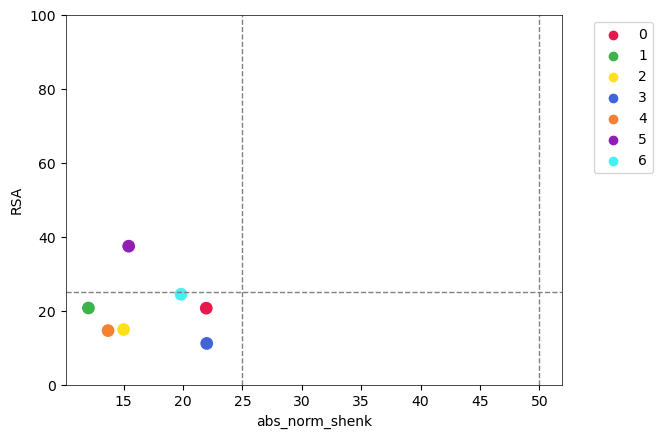

In [98]:
sns.scatterplot(
    data = bss_df,
    x = "abs_norm_shenk",
    y = "RSA",
    hue = "bs_id",
    palette = bss_df["color"].tolist(),
    s = 100
)
#plt.yscale('log')
plt.axhline(y=25, linestyle = "--", lw = 1, c = "gray")
plt.axvline(x = 25, linestyle = "--", lw = 1, c = "gray")
plt.axvline(x = 50, linestyle = "--", lw = 1, c = "gray")

plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [78]:
print(binding_ress_df.oddsratio.min())
print(binding_ress_df.oddsratio.max())

print(binding_ress_df.abs_norm_shenkin.min())
print(binding_ress_df.abs_norm_shenkin.max())

0.0
2.47
0.09
40.89


In [79]:
binding_ress_df.query('oddsratio == 0')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites
10,50,12,6.65,36,2450,1.45,98.55,1.23,0.57,6.65,...,25.0,75.0,0,0.0,0.55,3.04,G,19.21,E,5
14,54,16,7.06,58,2428,2.33,97.67,2.01,0.93,7.06,...,25.0,75.0,0,0.0,0.55,3.04,M,27.64,C,6
85,125,177,51.85,1486,1000,59.77,40.23,86.92,40.22,51.85,...,50.0,50.0,0,0.0,0.31,2.92,F,16.77,H,5
171,211,345,45.40,1540,946,61.95,38.05,74.69,34.56,45.40,...,62.5,37.5,0,0.0,0.18,2.90,A,2.48,H,3
195,235,371,23.84,1608,878,64.68,35.32,33.82,15.65,23.84,...,62.5,37.5,0,0.0,0.18,2.90,I,4.22,C,3
220,265,571,24.79,1608,878,64.68,35.32,35.62,16.48,24.79,...,62.5,37.5,0,0.0,0.18,2.90,Q,34.28,S,0
220,265,571,24.79,1608,878,64.68,35.32,35.62,16.48,24.79,...,62.5,37.5,0,0.0,0.18,2.90,Q,34.28,S,4
405,450,906,22.49,1208,1278,48.59,51.41,31.26,14.46,22.49,...,62.5,37.5,0,0.0,0.18,2.90,F,13.55,T,0
428,473,960,11.62,1586,900,63.80,36.20,10.65,4.93,11.62,...,62.5,37.5,0,0.0,0.18,2.90,E,37.82,E,1
431,476,963,22.76,1586,900,63.80,36.20,31.77,14.70,22.76,...,62.5,37.5,0,0.0,0.18,2.90,S,33.90,E,1


### Inspecting binding site ligand membership

In [80]:
bs_ligs_dict = {bs_id: sorted(bs_rows.lig_name.tolist()) for bs_id, bs_rows in bs_def_df.groupby("binding_site")}

In [81]:
for k, v in bs_ligs_dict.items():
    print("{}: {}".format(k, v))

0: ['LIG', 'LIG', 'LIG', 'LIG', 'LIG']
1: ['LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG']
2: ['LIG', 'LIG', 'LIG', 'LIG']
3: ['LIG', 'LIG', 'LIG', 'LIG']
4: ['LIG', 'LIG']
5: ['LIG']
6: ['LIG', 'LIG']


In [82]:
binding_ress_df.query('binding_sites == 6 & abs_norm_shenkin > 50 & oddsratio < 1')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites


In [83]:
binding_ress_df.query('binding_sites == 12 & pvalue < 0.1')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites


### Plotting Missense enrichment vs Divergence for each site

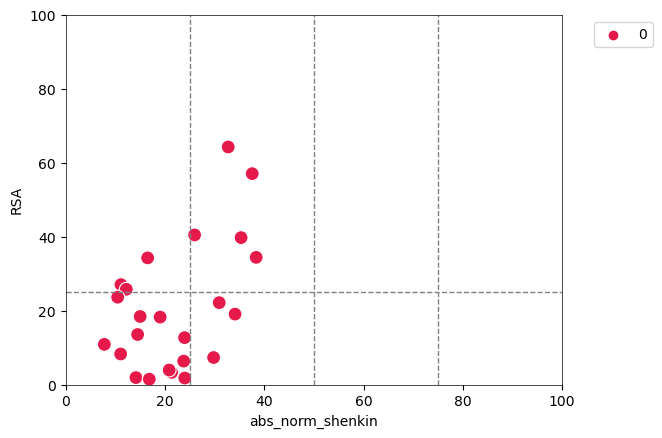

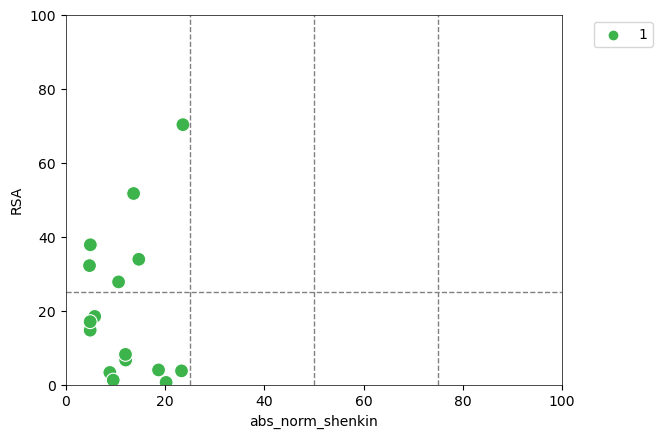

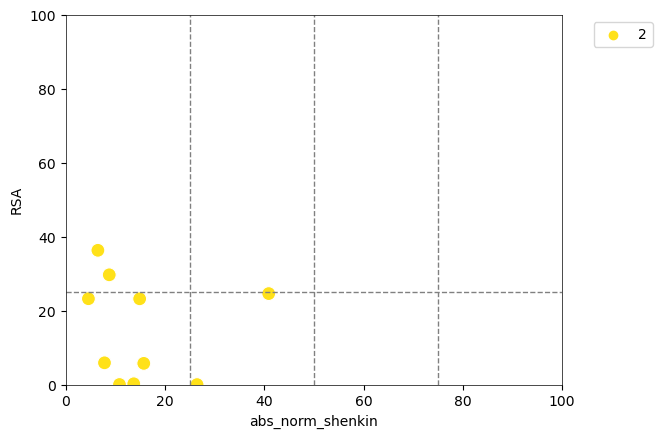

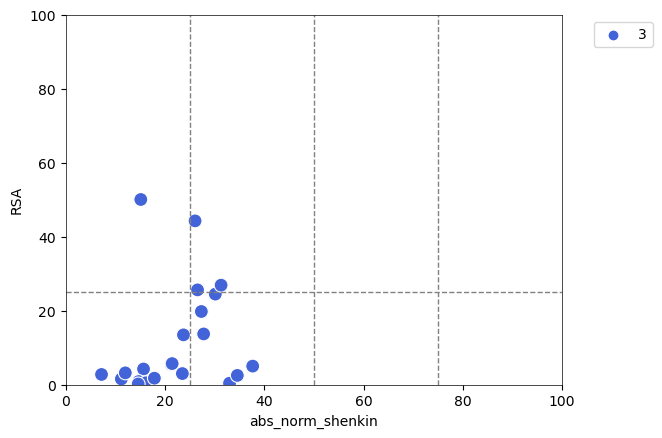

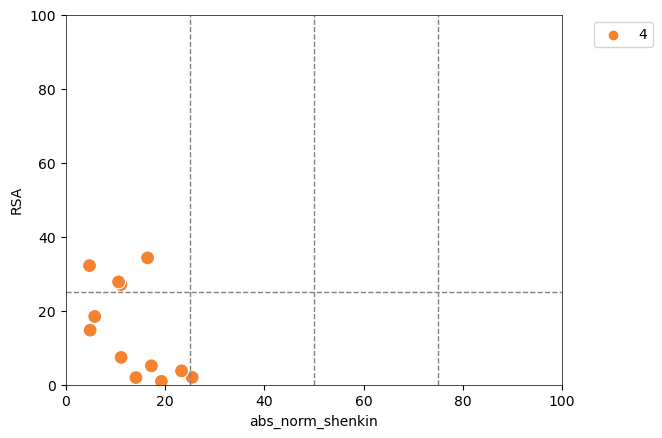

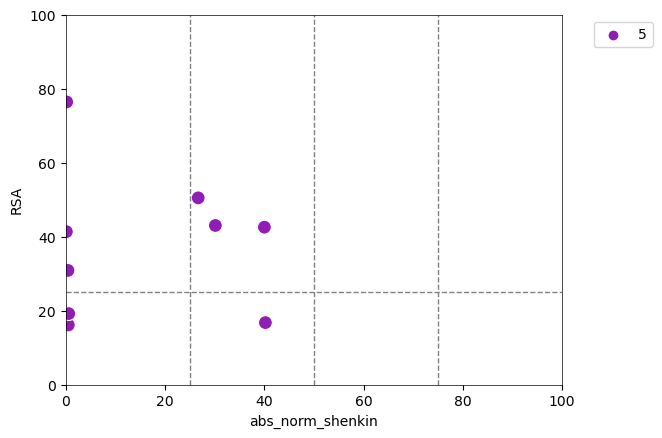

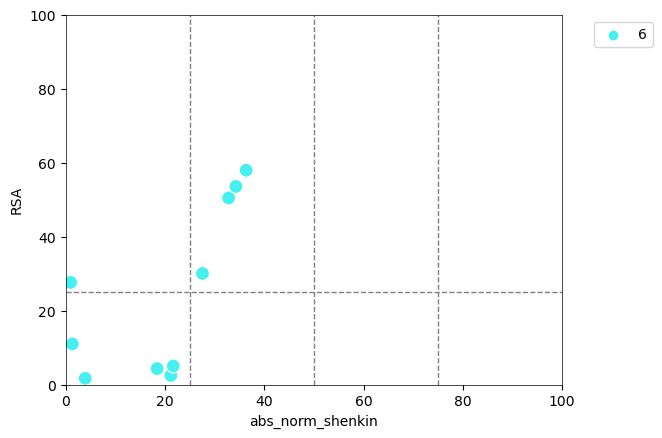

In [100]:
for bs in un_bss:  
    bs_df = binding_ress_df.query('binding_sites == @bs')
    sns.scatterplot(
        data = bs_df,
        x = "abs_norm_shenkin",
        y = "RSA",
        hue = "binding_sites",
        palette = [sample_colors[bs]],
        s = 100
    )
    #print([sample_colors[bs] for i in range(len(bs_df))])
    #plt.yscale('log')
    plt.axhline(y=25, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 25, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 50, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 75, linestyle = "--", lw = 1, c = "gray")
    
    plt.xlim(0,100)
    plt.ylim(0,100)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

## FUNCTIONAL SCORE PER SITE

In [85]:
rsa_profs_dict

{0: [12.7,
  34.42,
  18.43,
  59.02,
  42.86,
  3.3,
  34.28,
  27.05,
  1.89,
  8.28,
  25.79,
  6.35,
  1.77,
  13.55,
  18.26,
  40.49,
  64.29,
  7.32,
  39.76,
  19.07,
  57.07,
  22.17,
  1.47,
  3.94,
  23.64,
  10.88],
 1: [32.19,
  70.32,
  6.64,
  51.7,
  8.17,
  18.44,
  37.82,
  3.96,
  0.59,
  33.9,
  27.78,
  3.71,
  14.72,
  3.28,
  17.02,
  1.2],
 2: [23.23, 24.62, 0.0, 29.7, 36.33, 5.74, 0.22, 23.21, 0.02, 5.89],
 3: [24.48,
  25.62,
  1.52,
  3.17,
  2.98,
  44.29,
  0.38,
  5.0,
  2.48,
  5.5,
  26.9,
  13.7,
  0.96,
  4.22,
  0.82,
  0.48,
  2.74,
  5.68,
  0.16,
  50.08,
  13.45,
  19.77,
  1.73],
 4: [34.28,
  27.05,
  1.89,
  1.95,
  32.19,
  18.44,
  5.08,
  0.87,
  7.36,
  27.78,
  3.71,
  14.72],
 5: [41.38, 76.48, 30.89, 16.13, 19.21, 50.52, 43.05, 16.77, 42.59],
 6: [27.64, 10.99, 1.69, 2.5, 30.07, 4.32, 50.51, 53.62, 5.03, 58.0]}

In [86]:
max_len = max([len(v) for v in rsa_profs_dict.values()])
bs_vectors = []
bs_vectors_dict = {}
for bs_id, rsa_sig in rsa_profs_dict.items():
    rsa_sig_len = len(rsa_sig)
    rsa_range_prop = [0 for i in range(10)] # now let us change to 10
    for rsa in rsa_sig:
        prop_i = int(rsa/10) # 10 RSA BINS: b1 = [0,10), b2 = [10, 20), ... b10 = [90, MAX)
        if prop_i > 9: # if greater than 100, put in 10th bin
            prop_i = 9
        #print(prop_i)
        rsa_range_prop[prop_i] += 1
    rsa_range_prop = [round(i/rsa_sig_len, 3) for i in rsa_range_prop]
    rsa_range_prop.insert(0, rsa_sig_len/max_len) # ADDING BINDING SITE SIZE RELATIVE TO MAX SITE SIZE (IN THIS CASE 40)
    bs_vectors.append(rsa_range_prop)
    bs_vectors_dict[bs_id] = rsa_range_prop
    
vector_df = pd.DataFrame(bs_vectors, index = list(rsa_profs_dict.keys())) # obtaining RSA vectors, which are the 11-element features used for the machine learning

In [87]:
vector_df

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.308,0.231,0.154,0.115,0.077,0.077,0.038,0.000,0.0,0.0
1,0.615385,0.438,0.188,0.062,0.188,0.000,0.062,0.000,0.062,0.0,0.0
2,0.384615,0.500,0.000,0.400,0.100,0.000,0.000,0.000,0.000,0.0,0.0
3,0.884615,0.652,0.130,0.130,0.000,0.043,0.043,0.000,0.000,0.0,0.0
4,0.461538,0.500,0.167,0.167,0.167,0.000,0.000,0.000,0.000,0.0,0.0
5,0.346154,0.000,0.333,0.000,0.111,0.333,0.111,0.000,0.111,0.0,0.0
6,0.384615,0.400,0.100,0.100,0.100,0.000,0.300,0.000,0.000,0.0,0.0


In [88]:
import keras

In [89]:
model_path = "/homes/2394007/JSU_LIGYSIS/ANN_results/diff_seeds/85406/models/85406_4_model_epoch_75_train_acc_0.88.h5"
final_model = keras.models.load_model(model_path)
final_preds = final_model.predict(x = vector_df, batch_size = 27, verbose = 0)
rounded_predictions = np.argmax(final_preds, axis = -1)

In [90]:
prop_func_dict = {0:0.58, 1: 0.18, 2:0.05, 3:0.04}

In [91]:
site_func_score_dict = {}
for i, el in enumerate(final_preds):
    site_func_score_dict[i] = 0
    for o, e in enumerate(el):
        site_func_score_dict[i] += e*prop_func_dict[o]
    #print([round(e,6) for e in el])
    
site_func_score_dict = {k: round(v, 4) for k, v in site_func_score_dict.items()}

In [92]:
site_func_score_dict

{0: 0.5762, 1: 0.5795, 2: 0.58, 3: 0.58, 4: 0.58, 5: 0.1605, 6: 0.5632}

In [93]:
bss_df["rsa_cluster"] = [el + 1 for el in list(rounded_predictions)]
bss_df["func_score"] = bss_df.bs_id.map(site_func_score_dict)

In [94]:
bss_df

,bs_id,size,occ_pct,abs_norm_shenk,human_occ_pct,human_shenk,OR,RSA,color,rsa_cluster,func_score
0,0,24,59.17,21.95,57.29,31.02,0.78,20.67,#e6194b,1,0.5762
1,1,16,63.30,12.03,66.41,19.72,0.81,20.72,#3cb44b,1,0.5795
2,2,10,34.42,14.99,48.75,23.09,1.27,14.90,#ffe119,1,0.5800
3,3,23,59.40,21.99,60.87,31.07,0.95,11.14,#4363d8,1,0.5800
4,4,12,65.37,13.68,68.75,21.60,0.71,14.61,#f58231,1,0.5800
5,5,9,26.84,15.42,31.94,23.58,0.82,37.45,#911eb4,2,0.1605
6,6,10,43.66,19.83,51.25,28.60,1.11,24.44,#46f0f0,1,0.5632
